# King County House Sales Data Analysis

## Overview

This project explores different components of location and details of homes in King County, which is located in Washington state of the U.S. Regression modeling to analyze house sales shows that the model can be used by real estate agents to predict the price of homes based on a set of location and house features. My partner, Jonny Hofmeister, will focus on models built from location features. This notebook will analyze models based from home features. In addition, both notebooks will follow the CRISP-DM Data Science Process with the exception of Deployment since it is outside the scope of this project. A shared notebook will combine and summarize analysis from both Jonny's and this notebook. 

## Business Understanding

The goal of this analysis is to create models that can be used to describe the influence of location and home features on the price. The stakeholder, a real estate agency, should be able to assist homeowners who are looking to buy and sell homes in King County. By understanding the house sales data, the real estate agency can give useful advice to homeowners on how location and characteristics of the home might increase the estimated value of their homes or what features to focus on when discussing budget. The models outlined will predict home prices based on selected features from data given for this analysis project. 

## Data Understanding


The King County House Sales dataset includes over 20,000 unique homes with details such as in what zipcode the house is located to the number of bedrooms and bathrooms in each home. The dataset includes the greater Seattle area of Washington. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv("data/kc_house_data.csv")

In [3]:
df.head(3)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


As seen above, descriptive statistics for all features in the dataset are shown. However, this notebook will focus on most of the home specific ones. By doing so, this could limit how location-based features affect price in relationship to home features. We will discuss this more in the combined analysis.

## Data Preparation

The target is to predict price of the home. This analysis looks specifically at features of the home, such as number of bedrooms. As mentioned, location features will be the focus of Jonny's analysis. 

We've both prepared the data through the same process to remain consistent. Due to the scope of the project, not all home features are included.

In [6]:
#33 bedrooms is probably a typo...removing this from the dataset
df[df['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [7]:
df = df[df['bedrooms'] < 33]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21596 non-null  int64  
 1   date           21596 non-null  object 
 2   price          21596 non-null  float64
 3   bedrooms       21596 non-null  int64  
 4   bathrooms      21596 non-null  float64
 5   sqft_living    21596 non-null  int64  
 6   sqft_lot       21596 non-null  int64  
 7   floors         21596 non-null  float64
 8   waterfront     19220 non-null  float64
 9   view           21533 non-null  float64
 10  condition      21596 non-null  int64  
 11  grade          21596 non-null  int64  
 12  sqft_above     21596 non-null  int64  
 13  sqft_basement  21596 non-null  object 
 14  yr_built       21596 non-null  int64  
 15  yr_renovated   17754 non-null  float64
 16  zipcode        21596 non-null  int64  
 17  lat            21596 non-null  float64
 18  long  

In [9]:
#checking for any duplicate homes and removing those
df.duplicated('id').value_counts()

False    21419
True       177
dtype: int64

In [10]:
df.drop_duplicates(subset='id', inplace=True)

In [11]:
#checking for null values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3804
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
#waterfront has null values, this feature is examined by Jonny but for consistency, removing this from the dataset
df.dropna(subset=['waterfront'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19066 non-null  int64  
 1   date           19066 non-null  object 
 2   price          19066 non-null  float64
 3   bedrooms       19066 non-null  int64  
 4   bathrooms      19066 non-null  float64
 5   sqft_living    19066 non-null  int64  
 6   sqft_lot       19066 non-null  int64  
 7   floors         19066 non-null  float64
 8   waterfront     19066 non-null  float64
 9   view           19009 non-null  float64
 10  condition      19066 non-null  int64  
 11  grade          19066 non-null  int64  
 12  sqft_above     19066 non-null  int64  
 13  sqft_basement  19066 non-null  object 
 14  yr_built       19066 non-null  int64  
 15  yr_renovated   15690 non-null  float64
 16  zipcode        19066 non-null  int64  
 17  lat            19066 non-null  float64
 18  long  

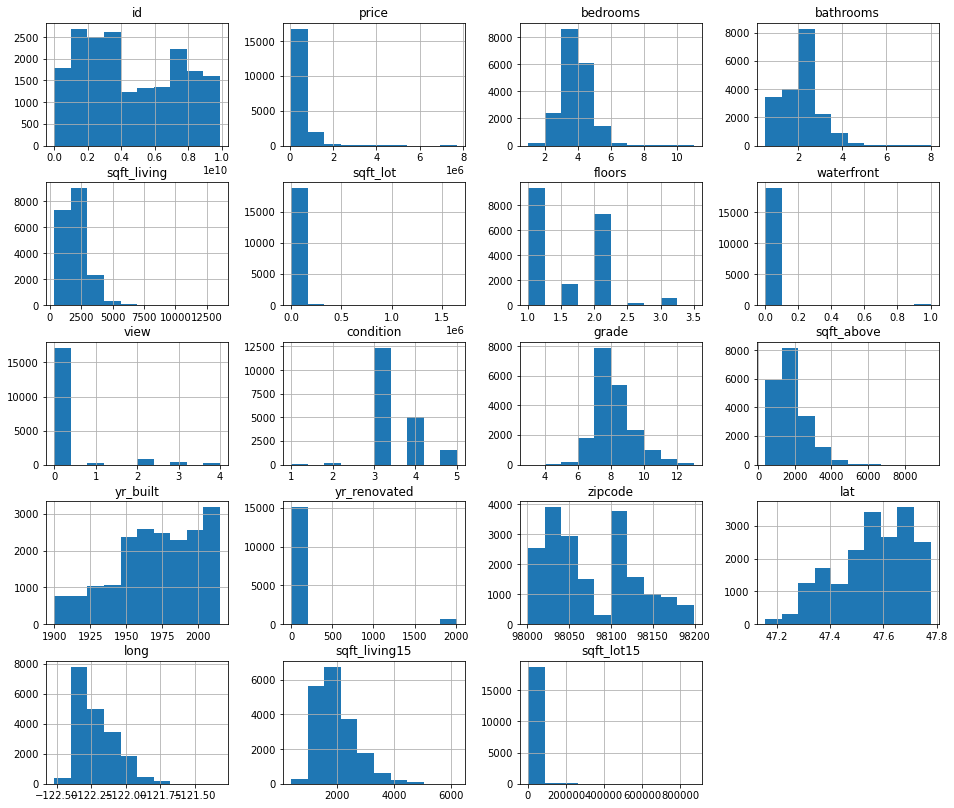

In [14]:
#examining the distribution of each feature by plotting histograms
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (16,14))
ax = fig.gca()
df.hist(ax = ax);

For the features I'm interested in, the continuous ones (price, sqft_living, yr_built) are slightly skewed, so I will log transform them. The categorical ones will be encoded later. For now, I'm going to leave bedrooms and bathrooms as continuous/numeric features rather than categorical.

In [15]:
continuous = ['price', 'sqft_living', 'yr_built']
df_cont = df[continuous]

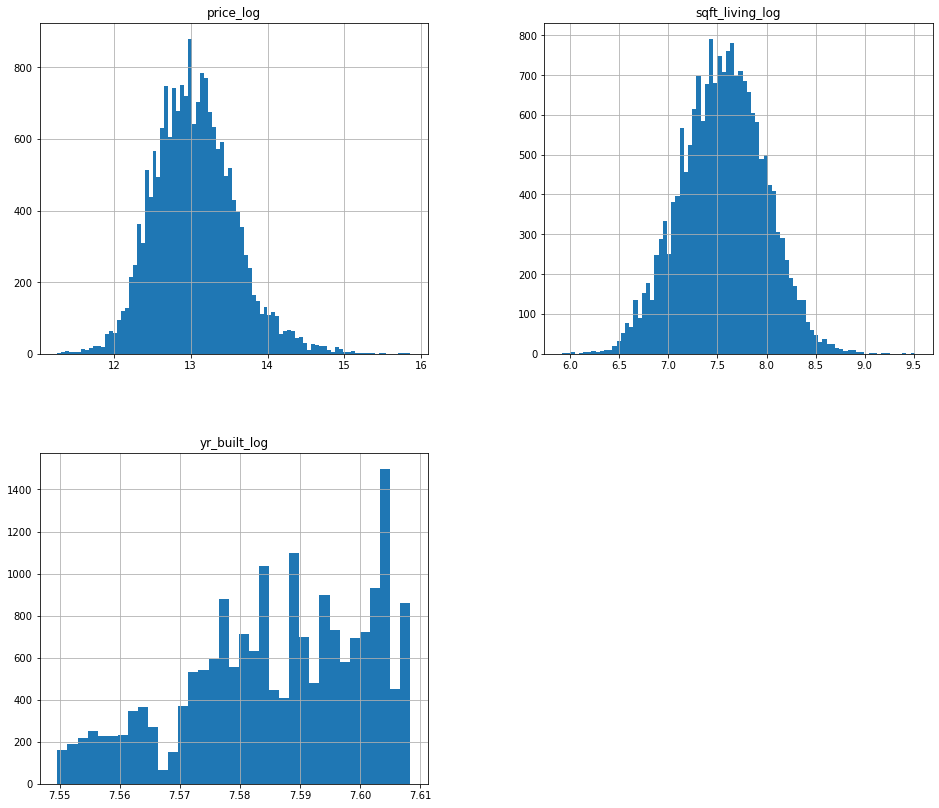

In [16]:
log_fts = [f'{column}_log' for column in df_cont.columns]

df_log = np.log(df_cont)
df_log.columns = log_fts
df_log.hist(figsize=(16, 14), bins='auto');

Next, I'm checking for multicolinearity between these continuous variables. 

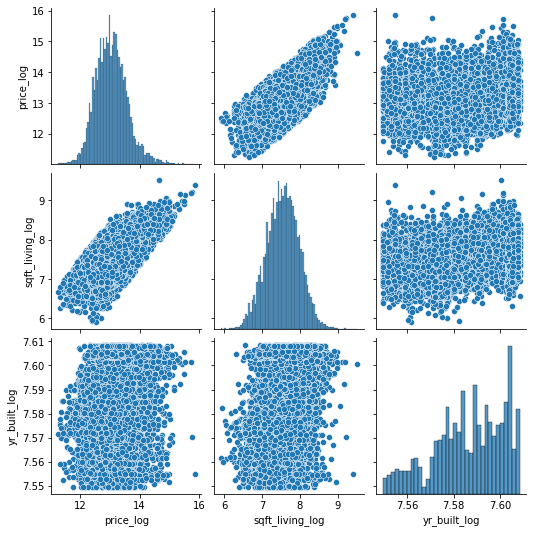

In [17]:
sns.pairplot(df_log)
plt.show()

There doesn't appear to be any colinear relationships between sqft_living and yr_built.

Now that these features look more normally distributed, I'll add these into a dataframe with the other features I'm interested in exploring for the model.

In [18]:
other_fts = df[['bedrooms', 'bathrooms', 'floors', 'condition', 'grade']]
df = pd.concat([other_fts, df_log], axis=1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19066 entries, 1 to 21596
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bedrooms         19066 non-null  int64  
 1   bathrooms        19066 non-null  float64
 2   floors           19066 non-null  float64
 3   condition        19066 non-null  int64  
 4   grade            19066 non-null  int64  
 5   price_log        19066 non-null  float64
 6   sqft_living_log  19066 non-null  float64
 7   yr_built_log     19066 non-null  float64
dtypes: float64(5), int64(3)
memory usage: 1.3 MB


In [20]:
df.corr()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log
bedrooms,1.000000,0.531992,0.188965,0.021090,0.372331,0.353855,0.640973,0.162800
bathrooms,0.531992,1.000000,0.505269,-0.129173,0.666786,0.552530,0.762262,0.504772
floors,0.188965,0.505269,1.000000,-0.266530,0.457093,0.313327,0.370592,0.486049
condition,0.021090,-0.129173,-0.266530,1.000000,-0.147896,0.037918,-0.051408,-0.364010
grade,0.372331,0.666786,0.457093,-0.147896,1.000000,0.705399,0.744455,0.443423
price_log,0.353855,0.552530,0.313327,0.037918,0.705399,1.000000,0.675040,0.079474
sqft_living_log,0.640973,0.762262,0.370592,-0.051408,0.744455,0.675040,1.000000,0.349103
yr_built_log,0.162800,0.504772,0.486049,-0.364010,0.443423,0.079474,0.349103,1.000000


There does appear to be multicollinearity between sqft_living with bathrooms and sqft_living with grade. For now, I'm going to leave both columns as is to see how these affect the initial model. Later on, I might drop or combine columns to reduce multicollinearity between these two.

## Modeling

There will be an initial baseline model and then three difference iterations or refinements to the model. To begin, I am splitting my dataframe to the target and predictors. I then split the dataframe into a train-test-split.  

### Initial Model

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [22]:
import statsmodels.api as sm
import functions as fn

In [23]:
y = df['price_log']
X = df.drop('price_log', axis=1)

In [24]:
#splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [25]:
#identifying the X columns
fir_cols = [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'bathrooms', 'floors',
    'condition'
]

fir_df = X_train[fir_cols]

fir_df_test = X_test[fir_cols]

In [26]:
fir_df.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,condition
14061,7.644919,7.592366,3,2.25,2.0,3
2795,7.590852,7.574558,4,1.75,1.0,5
21015,7.522941,7.605890,3,2.50,2.0,3
10094,7.114769,7.592366,2,1.50,2.0,3
20580,7.969012,7.603399,4,2.50,2.0,3


In [27]:
#scaling the continuous features, passing through the categorical one so they stay the same
ct = ColumnTransformer(
    [('scaler', StandardScaler(),
      ['sqft_living_log', 'yr_built_log', 'bedrooms', 'bathrooms', 'floors'])],
    remainder='passthrough')

fir_df_scaled = pd.DataFrame(ct.fit_transform(fir_df), columns=fir_cols)

In [28]:
fir_df_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,condition
0,0.211883,0.408055,-0.413894,0.165815,0.931725,3.0
1,0.084758,-0.778791,0.693360,-0.481732,-0.921228,5.0
2,-0.074918,1.309395,-0.413894,0.489589,0.931725,3.0
3,-1.034626,0.408055,-1.521148,-0.805505,0.931725,3.0
4,0.973902,1.143398,0.693360,0.489589,0.931725,3.0


In [29]:
#using pd.get_dummies to encode condition, multicolinearity addressed by dropping first column
cond_dummies = pd.get_dummies(fir_df_scaled['condition'], prefix='cond', drop_first=True)

In [30]:
#removing the original condition column from the data to add the dummy column instead
fir_df_scaled = fir_df_scaled.drop(['condition'], axis=1)

fir_df_scaled = pd.concat([fir_df_scaled, cond_dummies], axis=1)
fir_df_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,0.211883,0.408055,-0.413894,0.165815,0.931725,0,1,0,0
1,0.084758,-0.778791,0.693360,-0.481732,-0.921228,0,0,0,1
2,-0.074918,1.309395,-0.413894,0.489589,0.931725,0,1,0,0
3,-1.034626,0.408055,-1.521148,-0.805505,0.931725,0,1,0,0
4,0.973902,1.143398,0.693360,0.489589,0.931725,0,1,0,0


Now that I've scaled and encoded the training data set, I have to do the same for testing data set.

In [31]:
fir_df_test_scaled = pd.DataFrame(ct.transform(fir_df_test), columns=fir_cols)

cond_dummies_test = pd.get_dummies(fir_df_test_scaled['condition'], prefix='cond', drop_first=True)

fir_df_test_scaled = fir_df_test_scaled.drop(['condition'], axis=1)

fir_df_test_scaled = pd.concat([fir_df_test_scaled, cond_dummies_test], axis=1)
fir_df_test_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,-1.172395,1.243046,-0.413894,-0.805505,2.784677,0,1,0,0
1,1.183904,0.542358,0.693360,0.489589,0.931725,0,1,0,0
2,-0.152438,-0.744586,-0.413894,-0.481732,-0.921228,0,0,1,0
3,-0.460780,0.676392,-0.413894,0.165815,-0.921228,0,1,0,0
4,-0.401626,-1.466600,-0.413894,-0.481732,-0.921228,0,0,0,1


In [32]:
#without resetting y, the index was mismatched and caused an error
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [33]:
model_one = sm.OLS(y_train, sm.add_constant(fir_df_scaled)).fit()

model_one.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     1847.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:19:35   Log-Likelihood:                -5682.0
No. Observations:               14299   AIC:                         1.138e+04
Df Residuals:                   14289   BIC:                         1.146e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.8225      0.083    154.889      0.000      12.660      12.985
sqft_living_log     0.3597      0.005     69.689      0.000       0.350       0.370
yr_built_log       -0.1557      0.004    -40.022      0.000      -0.163      -0.148
bedrooms           -0.0895      0.004    -22.439      0.000      -0.097      -0.082
bathrooms           0.1081      0.005     20.449      0.000       0.098       0.119
floors              0.0732      0.004     19.575      0.000       0.066       0.080
cond_2.0           -0.0292      0.090     -0.326      0.745      -0.205       0.147
cond_3.0            0.2265      0.083      2.732      0.006       0.064       0.389
cond_4.0            0.2364      0.083      2.850      0.004       0.074       0.399
cond_5.0            0.2779      0.083      3.332      0.001       0.114       0.441
==============================================================================
Omnibus:                        5.845   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                5.918
Skew:                           0.036   Prob(JB):                       0.0519
Kurtosis:                       3.068   Cond. No.                         105.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

How well will this model perfom on the test data?

In [34]:
fir_lr = LinearRegression()

fir_lr.fit(fir_df_scaled, y_train)

LinearRegression()

In [35]:
fir_train_preds = fir_lr.predict(fir_df_scaled)
fir_test_preds = fir_lr.predict(fir_df_test_scaled)

In [36]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, fir_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, fir_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, fir_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, fir_test_preds, squared=False)}')

Train Scores:
R2: 0.5377012300845532
RMSE: 0.3600310774544085
-----
Test Scores:
R2: 0.5253655932023189
RMSE: 0.35917948330009514


In [37]:
#now to print RMSE in terms of $$ and not logged price
fn.print_metrics(y_train, fir_train_preds, y_test, fir_test_preds, log=True)

Training Scores
----------
R2: 0.5377
RMSE: 257118.3895
MAE: 155737.7999

**********
Testing Scores
----------
R2: 0.5254
RMSE: 247989.4272
MAE: 152042.6173


Assessing the Model:

On the training data, about 54% of the data fits the regression model. Between the training and test data, there isn't a major difference but it did perform slightly worse on the test set. However, in the context of price predictions the RMSE is very high. The p-values for all but one of the predictors appear to be significant because they are all 0.000. An overall condition of 2 did not describe the variance in the data.

### Initial Refinement

For the first iteration, I will drop the bathroom feature to see how it will affect the model. As mentioned earlier, bathroom and sqft_living showed multicollinearity. I'm also curious to see how condition of 1 is as predictor in this data.

In [38]:
sec_cols = [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'floors', 'condition'
]

sec_df = X_train[sec_cols]

sec_df_test = X_test[sec_cols]

In [39]:
sec_ct = ColumnTransformer(
    [('bb_transform', StandardScaler(),
      ['sqft_living_log', 'yr_built_log', 'bedrooms', 'floors'])],
    remainder='passthrough')

sec_df_scaled = pd.DataFrame(sec_ct.fit_transform(sec_df), columns=sec_cols)

In [40]:
cond_dummies = pd.get_dummies(sec_df_scaled['condition'], prefix='cond', drop_first=True)

In [41]:
sec_df_scaled = sec_df_scaled.drop(['condition'], axis=1)

sec_df_scaled = pd.concat([sec_df_scaled, cond_dummies], axis=1)
sec_df_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,0.211883,0.408055,-0.413894,0.931725,0,1,0,0
1,0.084758,-0.778791,0.693360,-0.921228,0,0,0,1
2,-0.074918,1.309395,-0.413894,0.931725,0,1,0,0
3,-1.034626,0.408055,-1.521148,0.931725,0,1,0,0
4,0.973902,1.143398,0.693360,0.931725,0,1,0,0


In [42]:
sec_df_test_scaled = pd.DataFrame(sec_ct.transform(sec_df_test), columns=sec_cols)

cond_dummies_test = pd.get_dummies(sec_df_test_scaled['condition'], prefix='cond', drop_first=True)

sec_df_test_scaled = sec_df_test_scaled.drop(['condition'], axis=1)

sec_df_test_scaled = pd.concat([sec_df_test_scaled, cond_dummies_test], axis=1)
sec_df_test_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,-1.172395,1.243046,-0.413894,2.784677,0,1,0,0
1,1.183904,0.542358,0.693360,0.931725,0,1,0,0
2,-0.152438,-0.744586,-0.413894,-0.921228,0,0,1,0
3,-0.460780,0.676392,-0.413894,-0.921228,0,1,0,0
4,-0.401626,-1.466600,-0.413894,-0.921228,0,0,0,1


In [43]:
model_two = sm.OLS(y_train, sm.add_constant(sec_df_scaled)).fit()

model_two.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.524
Model:                            OLS   Adj. R-squared:                  0.524
Method:                 Least Squares   F-statistic:                     1968.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:19:36   Log-Likelihood:                -5888.3
No. Observations:               14299   AIC:                         1.179e+04
Df Residuals:                   14290   BIC:                         1.186e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.8127      0.084    152.563      0.000      12.648      12.977
sqft_living_log     0.4194      0.004     97.155      0.000       0.411       0.428
yr_built_log       -0.1324      0.004    -35.085      0.000      -0.140      -0.125
bedrooms           -0.0777      0.004    -19.407      0.000      -0.086      -0.070
floors              0.0921      0.004     25.085      0.000       0.085       0.099
cond_2.0           -0.0192      0.091     -0.211      0.833      -0.198       0.159
cond_3.0            0.2357      0.084      2.802      0.005       0.071       0.401
cond_4.0            0.2426      0.084      2.883      0.004       0.078       0.408
cond_5.0            0.3051      0.085      3.606      0.000       0.139       0.471
==============================================================================
Omnibus:                       13.167   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.464
Skew:                           0.059   Prob(JB):                      0.00119
Kurtosis:                       3.092   Cond. No.                         90.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
sec_lr = LinearRegression()

sec_lr.fit(sec_df_scaled, y_train)

LinearRegression()

In [45]:
sec_train_preds = sec_lr.predict(sec_df_scaled)
sec_test_preds = sec_lr.predict(sec_df_test_scaled)

In [46]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, sec_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, sec_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, sec_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, sec_test_preds, squared=False)}')

Train Scores:
R2: 0.5241728717418569
RMSE: 0.36526093006021415
-----
Test Scores:
R2: 0.5121192766183778
RMSE: 0.36415706669676856


In [47]:
fn.print_metrics(y_train, sec_train_preds, y_test, sec_test_preds, log=True)

Training Scores
----------
R2: 0.5242
RMSE: 267724.4037
MAE: 158118.8530

**********
Testing Scores
----------
R2: 0.5121
RMSE: 256635.6451
MAE: 154180.0135


Removing bathrooms due to collinearity diminished the model's performance slightly, approximately by 1%. Even though multicollinearity between the features has been reduced, let's see if combining bathroom with another column will impact the model.

### Model Refinement II

It makes the most sense to combine number of bathrooms to some relationship with number of bedrooms. Number of rooms is most likely relative to the size of the house/square footage. There are a few ways I could create a column with this relationship, but since bedrooms seem to be a significant feature, I will create a new column with the ratio of bathrooms to bedrooms instead of adding them together and creating a total number of rooms column.

In [48]:
#making a copy of our dataframe to add a new column that is the ratio of bathrooms to bedrooms

df2 = df.copy(deep=True)

In [49]:
df2['bed_bath_ratio'] = df2['bedrooms']/df2['bathrooms']

In [50]:
df2.head()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,bed_bath_ratio
1,3,2.25,2.0,3,7,13.195614,7.851661,7.576097,1.333333
2,2,1.00,1.0,3,6,12.100712,6.646391,7.566828,2.000000
3,4,3.00,1.0,5,7,13.311329,7.580700,7.583248,1.333333
4,3,2.00,1.0,3,8,13.142166,7.426549,7.594381,1.500000
5,4,4.50,1.0,3,11,14.022525,8.597851,7.601402,0.888889


In [51]:
y = df2['price_log']
X = df2.drop('price_log', axis=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

In [53]:
thr_cols = [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'bed_bath_ratio', 'floors',
    'condition'
]

thr_df = X_train[thr_cols]

thr_df_test = X_test[thr_cols]

In [54]:
thr_ct = ColumnTransformer([('scaler', StandardScaler(), [
    'sqft_living_log', 'yr_built_log', 'bedrooms', 'bed_bath_ratio', 'floors'
])],
                       remainder='passthrough')

thr_df_scaled = pd.DataFrame(thr_ct.fit_transform(thr_df), columns=thr_cols)

In [55]:
cond_dummies = pd.get_dummies(thr_df_scaled['condition'], prefix='cond', drop_first=True)

In [56]:
thr_df_scaled = thr_df_scaled.drop(['condition'], axis=1)

thr_df_scaled = pd.concat([thr_df_scaled, cond_dummies], axis=1)
thr_df_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bed_bath_ratio,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,0.211883,0.408055,-0.413894,-0.637486,0.931725,0,1,0,0
1,0.084758,-0.778791,0.693360,0.834537,-0.921228,0,0,0,1
2,-0.074918,1.309395,-0.413894,-0.843569,0.931725,0,1,0,0
3,-1.034626,0.408055,-1.521148,-0.637486,0.931725,0,1,0,0
4,0.973902,1.143398,0.693360,-0.225319,0.931725,0,1,0,0


In [57]:
thr_df_test_scaled = pd.DataFrame(thr_ct.transform(thr_df_test), columns=thr_cols)

cond_dummies_test = pd.get_dummies(thr_df_test_scaled['condition'], prefix='cond', drop_first=True)

thr_df_test_scaled = thr_df_test_scaled.drop(['condition'], axis=1)

thr_df_test_scaled = pd.concat([thr_df_test_scaled, cond_dummies_test], axis=1)
thr_df_test_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bed_bath_ratio,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0
0,-1.172395,1.243046,-0.413894,0.392930,2.784677,0,1,0,0
1,1.183904,0.542358,0.693360,-0.225319,0.931725,0,1,0,0
2,-0.152438,-0.744586,-0.413894,-0.048677,-0.921228,0,0,1,0
3,-0.460780,0.676392,-0.413894,-0.637486,-0.921228,0,1,0,0
4,-0.401626,-1.466600,-0.413894,-0.048677,-0.921228,0,0,0,1


In [58]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [59]:
model_three = sm.OLS(y_train, sm.add_constant(thr_df_scaled)).fit()

model_three.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     1789.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:19:36   Log-Likelihood:                -5804.0
No. Observations:               14299   AIC:                         1.163e+04
Df Residuals:                   14289   BIC:                         1.170e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.8198      0.083    153.541      0.000      12.656      12.983
sqft_living_log     0.3871      0.005     78.082      0.000       0.377       0.397
yr_built_log       -0.1484      0.004    -37.589      0.000      -0.156      -0.141
bedrooms           -0.0432      0.005     -9.020      0.000      -0.053      -0.034
bed_bath_ratio     -0.0553      0.004    -13.013      0.000      -0.064      -0.047
floors              0.0838      0.004     22.599      0.000       0.077       0.091
cond_2.0           -0.0268      0.090     -0.296      0.767      -0.204       0.151
cond_3.0            0.2301      0.084      2.751      0.006       0.066       0.394
cond_4.0            0.2358      0.084      2.819      0.005       0.072       0.400
cond_5.0            0.2841      0.084      3.377      0.001       0.119       0.449
==============================================================================
Omnibus:                       17.025   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.644
Skew:                           0.065   Prob(JB):                     0.000147
Kurtosis:                       3.113   Cond. No.                         94.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
thr_lr = LinearRegression()

thr_lr.fit(thr_df_scaled, y_train)

LinearRegression()

In [61]:
thr_train_preds = thr_lr.predict(thr_df_scaled)
thr_test_preds = thr_lr.predict(thr_df_test_scaled)

In [62]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, thr_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, thr_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, thr_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, thr_test_preds, squared=False)}')

Train Scores:
R2: 0.5297458986296958
RMSE: 0.3631156083266481
-----
Test Scores:
R2: 0.5172234610997211
RMSE: 0.3622471614377949


In [63]:
fn.print_metrics(y_train, thr_train_preds, y_test, thr_test_preds, log=True)

Training Scores
----------
R2: 0.5297
RMSE: 266407.0442
MAE: 157282.2412

**********
Testing Scores
----------
R2: 0.5172
RMSE: 255296.9012
MAE: 153511.2630


In [64]:
df2.corr()

,bedrooms,bathrooms,floors,condition,grade,price_log,sqft_living_log,yr_built_log,bed_bath_ratio
bedrooms,1.000000,0.531992,0.188965,0.021090,0.372331,0.353855,0.640973,0.162800,0.174357
bathrooms,0.531992,1.000000,0.505269,-0.129173,0.666786,0.552530,0.762262,0.504772,-0.662250
floors,0.188965,0.505269,1.000000,-0.266530,0.457093,0.313327,0.370592,0.486049,-0.379876
condition,0.021090,-0.129173,-0.266530,1.000000,-0.147896,0.037918,-0.051408,-0.364010,0.134934
grade,0.372331,0.666786,0.457093,-0.147896,1.000000,0.705399,0.744455,0.443423,-0.406151
price_log,0.353855,0.552530,0.313327,0.037918,0.705399,1.000000,0.675040,0.079474,-0.302532
sqft_living_log,0.640973,0.762262,0.370592,-0.051408,0.744455,0.675040,1.000000,0.349103,-0.339608
yr_built_log,0.162800,0.504772,0.486049,-0.364010,0.443423,0.079474,0.349103,1.000000,-0.441372
bed_bath_ratio,0.174357,-0.662250,-0.379876,0.134934,-0.406151,-0.302532,-0.339608,-0.441372,1.000000


Again, not much difference from the initial model. It improved the r2 score from the first iteration, but it is slightly less than the initial model. Additionally, in the initial model the RMSE was slightly lower. By combining bathrooms to bedrooms through ratio, multicolinearity between sqft living and bathrooms was addressed. It makes sense to keep bathrooms in as a feature, whether separately or as a ratio to bedrooms as it does have a low p-value.

### Model Refinement III

For the final refinement, I'm going to add grade. Like condition, it is not necessarily a specific home feature such as number of bedrooms. It is a scale that identifies where the specific home falls on, such as quality materials or custom design. Since grade is a little more interpretive than condition, I used condition first in the baseline and opted to not use grade since there was some multicollinearity with sqft_living.

In [65]:
fir_cols.append('grade')

In [66]:
fir_df = X_train[fir_cols]

fir_df_test = X_test[fir_cols]

In [67]:
fir_df.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,condition,grade
14061,7.644919,7.592366,3,2.25,2.0,3,8
2795,7.590852,7.574558,4,1.75,1.0,5,6
21015,7.522941,7.605890,3,2.50,2.0,3,7
10094,7.114769,7.592366,2,1.50,2.0,3,7
20580,7.969012,7.603399,4,2.50,2.0,3,9


In [68]:
fir_df_scaled = pd.DataFrame(ct.fit_transform(fir_df), columns=fir_cols)

In [69]:
cond_dummies = pd.get_dummies(fir_df_scaled['condition'], prefix='cond', drop_first=True)
grd_dummies = pd.get_dummies(fir_df_scaled['grade'], prefix='grd', drop_first=True)

In [70]:
fir_df_scaled = fir_df_scaled.drop(['condition', 'grade'], axis=1)

fir_df_scaled = pd.concat([fir_df_scaled, cond_dummies, grd_dummies], axis=1)
fir_df_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0,grd_4.0,grd_5.0,grd_6.0,grd_7.0,grd_8.0,grd_9.0,grd_10.0,grd_11.0,grd_12.0,grd_13.0
0,0.211883,0.408055,-0.413894,0.165815,0.931725,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,0.084758,-0.778791,0.693360,-0.481732,-0.921228,0,0,0,1,0,0,1,0,0,0,0,0,0,0
2,-0.074918,1.309395,-0.413894,0.489589,0.931725,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,-1.034626,0.408055,-1.521148,-0.805505,0.931725,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,0.973902,1.143398,0.693360,0.489589,0.931725,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
fir_df_test_scaled = pd.DataFrame(ct.transform(fir_df_test), columns=fir_cols)

cond_dummies_test = pd.get_dummies(fir_df_test_scaled['condition'], prefix='cond', drop_first=True)
grd_dummies_test = pd.get_dummies(fir_df_test_scaled['grade'], prefix='grd', drop_first=True)

fir_df_test_scaled = fir_df_test_scaled.drop(['condition', 'grade'], axis=1)

fir_df_test_scaled = pd.concat([fir_df_test_scaled, cond_dummies_test, grd_dummies_test], axis=1)
fir_df_test_scaled = fir_df_test_scaled.reindex(columns = fir_df_scaled.columns, fill_value=0)
fir_df_test_scaled.head()

,sqft_living_log,yr_built_log,bedrooms,bathrooms,floors,cond_2.0,cond_3.0,cond_4.0,cond_5.0,grd_4.0,grd_5.0,grd_6.0,grd_7.0,grd_8.0,grd_9.0,grd_10.0,grd_11.0,grd_12.0,grd_13.0
0,-1.172395,1.243046,-0.413894,-0.805505,2.784677,0,1,0,0,0,0,0,0,1,0,0,0,0,0
1,1.183904,0.542358,0.693360,0.489589,0.931725,0,1,0,0,0,0,0,0,0,0,1,0,0,0
2,-0.152438,-0.744586,-0.413894,-0.481732,-0.921228,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,-0.460780,0.676392,-0.413894,0.165815,-0.921228,0,1,0,0,0,0,0,1,0,0,0,0,0,0
4,-0.401626,-1.466600,-0.413894,-0.481732,-0.921228,0,0,0,1,0,0,0,1,0,0,0,0,0,0


In [83]:
model_four = sm.OLS(y_train, sm.add_constant(fir_df_scaled)).fit()

model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1343.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:21:07   Log-Likelihood:                -3870.4
No. Observations:               14299   AIC:                             7781.
Df Residuals:                   14279   BIC:                             7932.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5509      0.326     38.480      0.000      11.912      13.190
sqft_living_log     0.1711      0.005     31.487      0.000       0.160       0.182
yr_built_log       -0.1846      0.004    -52.263      0.000      -0.192      -0.178
bedrooms           -0.0421      0.004    -11.677      0.000      -0.049      -0.035
bathrooms           0.0730      0.005     15.370      0.000       0.064       0.082
floors              0.0393      0.003     11.646      0.000       0.033       0.046
cond_2.0           -0.0951      0.079     -1.200      0.230      -0.250       0.060
cond_3.0            0.1020      0.073      1.389      0.165      -0.042       0.246
cond_4.0            0.1226      0.073      1.670      0.095      -0.021       0.267
cond_5.0            0.1821      0.074      2.465      0.014       0.037       0.327
grd_4.0            -0.1697      0.326     -0.521      0.602      -0.808       0.469
grd_5.0            -0.1916      0.319     -0.602      0.548      -0.816       0.433
grd_6.0            -0.0200      0.318     -0.063      0.950      -0.643       0.603
grd_7.0             0.2311      0.318      0.727      0.467      -0.392       0.854
grd_8.0             0.4618      0.318      1.452      0.146      -0.161       1.085
grd_9.0             0.7293      0.318      2.292      0.022       0.106       1.353
grd_10.0            0.9432      0.318      2.963      0.003       0.319       1.567
grd_11.0            1.1384      0.319      3.570      0.000       0.513       1.763
grd_12.0            1.4226      0.321      4.435      0.000       0.794       2.051
grd_13.0            1.6001      0.334      4.787      0.000       0.945       2.255
==============================================================================
Omnibus:                       35.656   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.577
Skew:                          -0.028   Prob(JB):                     2.09e-10
Kurtosis:                       3.268   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
four_lr = LinearRegression()

four_lr.fit(fir_df_scaled, y_train)

LinearRegression()

In [74]:
four_train_preds = four_lr.predict(fir_df_scaled)
four_test_preds = four_lr.predict(fir_df_test_scaled)

In [75]:
print('Train Scores:')
print(f'R2: {r2_score(y_train, four_train_preds)}')
print(f'RMSE: {mean_squared_error(y_train, four_train_preds, squared=False)}')
print("-----")
print('Test Scores:')
print(f'R2: {r2_score(y_test, four_test_preds)}')
print(f'RMSE: {mean_squared_error(y_test, four_test_preds, squared=False)}')

Train Scores:
R2: 0.6411804476645817
RMSE: 0.31718794355899205
-----
Test Scores:
R2: 0.6281732011949219
RMSE: 0.3179085852741143


In [76]:
fn.print_metrics(y_train, four_train_preds, y_test, four_test_preds, log=True)

Training Scores
----------
R2: 0.6412
RMSE: 220667.2624
MAE: 135444.6735

**********
Testing Scores
----------
R2: 0.6282
RMSE: 215618.6674
MAE: 132438.9579


By adding grade in as a predictor, the r2 score increased by about 11%, explaining for 64% of the variance in our training data and about 63% in the test data. The RMSE is lower but still high in the context of over $200,000. As mentioned before the p-values show that there are not extraneous features, however, with the encoded features, lower grades and condition values have higher than 0.05 p-values, indicating it is not significant in describing the variance of the data. 

## Evaluation

From the initial and iterations, the models were able to explain 53-64% of the variance in the training and testing sets. Although I can see the magnitude of the predictors in the dataset, using home specific features alone inhibits the ability to have a greater understanding of what features have the greatest effect. It's generally understood that location is an important factor for homeowners, which is why it is helpful to understand Jonny's analysis as well.

We are able to present stakeholders what features influence price, however, when applying our model to a new subset of data, there is a large error when looking at RMSE in dollars. 

To further evaluate my model, I'm checking to see if the residuals are normally distributed and if the errors display any heteroscedasticity.

In [77]:
import statsmodels.api as sm
import scipy.stats as stats

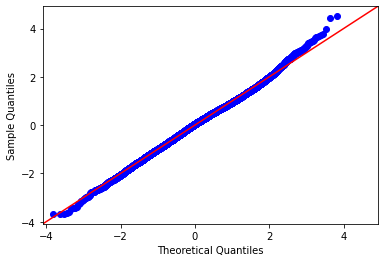

In [78]:
fig = sm.graphics.qqplot(model_four.resid, dist=stats.norm, line='45', fit=True)

It looks very robust, with a few violations towards the higher tail of the data.

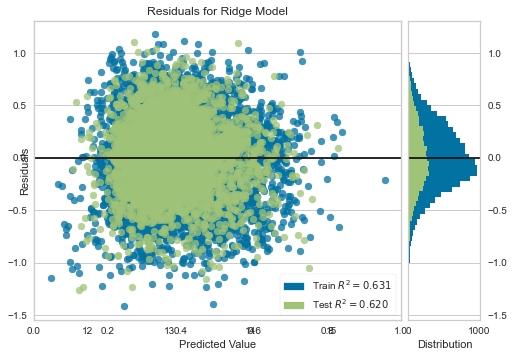

In [81]:
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

rp = Ridge()
visualizer = ResidualsPlot(rp)

visualizer = ResidualsPlot(rp, hist=True, qqplot=False)
visualizer.fit(fir_df, y_train)
visualizer.score(fir_df_test, y_test)
visualizer.show();

The residuals for the last model are distributed normally.

In [84]:
model_four.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.641
Method:                 Least Squares   F-statistic:                     1343.
Date:                Wed, 23 Jun 2021   Prob (F-statistic):               0.00
Time:                        17:21:11   Log-Likelihood:                -3870.4
No. Observations:               14299   AIC:                             7781.
Df Residuals:                   14279   BIC:                             7932.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              12.5509      0.326     38.480      0.000      11.912      13.190
sqft_living_log     0.1711      0.005     31.487      0.000       0.160       0.182
yr_built_log       -0.1846      0.004    -52.263      0.000      -0.192      -0.178
bedrooms           -0.0421      0.004    -11.677      0.000      -0.049      -0.035
bathrooms           0.0730      0.005     15.370      0.000       0.064       0.082
floors              0.0393      0.003     11.646      0.000       0.033       0.046
cond_2.0           -0.0951      0.079     -1.200      0.230      -0.250       0.060
cond_3.0            0.1020      0.073      1.389      0.165      -0.042       0.246
cond_4.0            0.1226      0.073      1.670      0.095      -0.021       0.267
cond_5.0            0.1821      0.074      2.465      0.014       0.037       0.327
grd_4.0            -0.1697      0.326     -0.521      0.602      -0.808       0.469
grd_5.0            -0.1916      0.319     -0.602      0.548      -0.816       0.433
grd_6.0            -0.0200      0.318     -0.063      0.950      -0.643       0.603
grd_7.0             0.2311      0.318      0.727      0.467      -0.392       0.854
grd_8.0             0.4618      0.318      1.452      0.146      -0.161       1.085
grd_9.0             0.7293      0.318      2.292      0.022       0.106       1.353
grd_10.0            0.9432      0.318      2.963      0.003       0.319       1.567
grd_11.0            1.1384      0.319      3.570      0.000       0.513       1.763
grd_12.0            1.4226      0.321      4.435      0.000       0.794       2.051
grd_13.0            1.6001      0.334      4.787      0.000       0.945       2.255
==============================================================================
Omnibus:                       35.656   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.577
Skew:                          -0.028   Prob(JB):                     2.09e-10
Kurtosis:                       3.268   Cond. No.                         682.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model results for the last iteration on the training included home square footage, the year the home was built, number of bedrooms and bathrooms in the home, the total number of floors/levels, and a condition score indicating overall condition of the home, and lastly, an overall grade given to the housing unit based on King County grading system.  